# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** K

**Names:**

* Xavier Jeanmonod
* Adrian Baudat
* Simon Wicky

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import json

with open("../data/nyc_augmented_network.json", 'r') as file:
    dict_network = json.load(file)
    
G = nx.Graph()
for node in dict_network["nodes"]:
    G.add_node(node["id"], id=node["id"], coordinates=node["coordinates"])
    
for edge in dict_network["links"]:
    G.add_edge(edge["source"], edge["target"])
#Starting from here, the graph is ready


In [29]:
import epidemics_helper
MAX_DAYS = 100
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)
sir.launch_epidemic(source=23654, max_time=MAX_DAYS)

Epidemic stopped after 107.91 days | 107.91 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


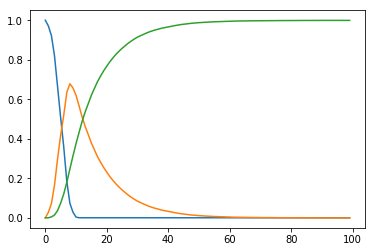

First day where 60%+ of the population is infected : 7
First day where 60%+ of the population is dead : 15


In [30]:
list_susceptible = []
list_infected = []
list_recovered = []
for t in range(0,MAX_DAYS):
    nb_infected = 0
    nb_recovered = 0
    nb_susceptible = 0
    for i in range(len(sir.inf_time)):
        if sir.inf_time[i] > t:
            nb_susceptible += 1
        elif sir.rec_time[i] > t:
            nb_infected += 1
        else:
            nb_recovered += 1
    list_susceptible.append(nb_susceptible)
    list_infected.append(nb_infected)
    list_recovered.append(nb_recovered)
    
#The lists contain the number of nodes susceptible/infected/recovered at time t

#Plotting the percentage
list_susceptible = list(map(lambda x : x / len(G.nodes), list_susceptible))
list_recovered = list(map(lambda x : x / len(G.nodes), list_recovered))
list_infected = list(map(lambda x : x / len(G.nodes), list_infected))


plt.plot(list_susceptible)
plt.plot(list_infected)
plt.plot(list_recovered)
plt.show()


#Finding the first occurence of a value > 0.6
print("First day where 60%+ of the population is infected : " 
      + str(list_infected.index(next(i for i in list_infected if i > 0.6))))
print("First day where 60%+ of the population is dead : " 
      + str(list_recovered.index(next(i for i in list_recovered if i > 0.6))))

In [26]:
pos = {}
for node in G.nodes(data=True):
    pos[node[0]] = (node[1]["coordinates"][0],node[1]["coordinates"][1])
    
plt.figure(1,figsize=(50,50)) 
#nx.draw(G,pos, node_size=20,width=0.5)#, nodelist=list(G.nodes())[0:10])

#plt.show()

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

#### Exercise 2.11: Strategy 2